In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Beiwe

In [2]:
data_path = '%s/projects/beiwe-data/GxXEPM08ZK0GS1gIaLe9YhEn/d35pt9m4/'%os.getenv('HOME')

In [3]:
# For each data type, import the data

In [4]:
data_categories = next(os.walk(data_path))[1]
data_categories

['callLog',
 'accessibilityLog',
 'gps',
 'usage',
 'textsLog',
 'accel',
 'logFile',
 'powerState',
 'light',
 'wifiLog',
 'tapsLog']

In [5]:
def convert_timestamp(timestamp, zone='UTC'):
    datetime = pd.to_datetime(timestamp, unit='ms', origin='unix')
    if zone is'SG':
        datetime = datetime.tz_localize('UTC').tz_convert('Asia/Singapore')
    
    return datetime


def create_df(path, directory):
    df_raw = pd.DataFrame({})
    dir_path = os.path.join(path, directory)
    for file in os.listdir(dir_path):
        file_path = os.path.join(dir_path, file)
        df_raw = pd.concat([df_raw, pd.read_csv(file_path, error_bad_lines=False)])
    
    print(df_raw.columns)
    df = pd.DataFrame({})
    if 'timestamp' in df_raw.columns:
        df = df_raw[df_raw.timestamp != 'timestamp']
        df['timestamp'] = df['timestamp'].astype('str')
        df = df[df['timestamp'].str.len() == 13]
        df['datetime'] = df.timestamp.apply(convert_timestamp, zone='SG')
        df['day_of_week'] = df.datetime.dt.dayofweek
        df['hour'] = df.datetime.dt.hour

    return df

def plot_activity_heatmap(df, cat, norm=False):
    plot_data = df.groupby(['day_of_week', 'hour']).size().reset_index(name='count')
    if norm:
        plot_data['count'] = (plot_data['count'] - plot_data['count'].mean()) / plot_data['count'].std()

    fig, ax = plt.subplots(figsize=(10, 10))

    piv = pd.pivot_table(plot_data, values='count',index=['hour'], columns=['day_of_week'], fill_value=0)
    ax = sns.heatmap(piv, square=True, annot=True, cmap="BuPu")
    ax.invert_yaxis()
    plt.tight_layout()
    plt.title(cat)
    
def plot_value_heatmap(df, cat, norm=False):
    plot_data = df.groupby(['day_of_week', 'hour']).mean().reset_index()
    if norm:
        plot_data['value'] = (plot_data['value'] - plot_data['value'].mean()) / plot_data['value'].std()

    fig, ax = plt.subplots(figsize=(10, 10))

    piv = pd.pivot_table(plot_data, values='value',index=['hour'], columns=['day_of_week'], fill_value=0)
    ax = sns.heatmap(piv, square=True, annot=True, cmap="BuPu")
    ax.invert_yaxis()
    plt.tight_layout()
    plt.title(cat)
    
def plot_max_heatmap(df, cat, norm=False):
    plot_data = np.log(df.groupby(['day_of_week', 'hour']).max()).reset_index()
    if norm:
        plot_data['value'] = (plot_data['value'] - plot_data['value'].mean()) / plot_data['value'].std()

    fig, ax = plt.subplots(figsize=(12, 12))

    piv = pd.pivot_table(plot_data, values='value',index=['hour'], columns=['day_of_week'], fill_value=0)
    ax = sns.heatmap(piv, square=True, annot=True, cmap="BuPu", fmt='g')
    ax.invert_yaxis()
    plt.tight_layout()
    plt.title(cat)
    
def plot_logmax_heatmap(df, cat, norm=False):
    data = df.groupby(['day_of_week', 'hour']).max()
    data['value'] = np.log(data['value']+1)
    plot_data = data.reset_index()
    if norm:
        plot_data['value'] = (plot_data['value'] - plot_data['value'].mean()) / plot_data['value'].std()

    fig, ax = plt.subplots(figsize=(20, 20))

    piv = pd.pivot_table(plot_data, values='value',index=['hour'], columns=['day_of_week'], fill_value=0)
    ax = sns.heatmap(piv, square=True, annot=True, cmap="BuPu", fmt='.4g')
    ax.invert_yaxis()
    plt.tight_layout()
    plt.title(cat)

Index(['timestamp', 'accuracy', 'value'], dtype='object')


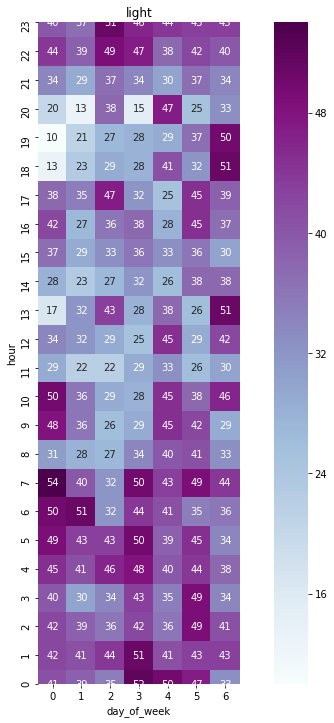

In [6]:
cat = 'light'
df = create_df(data_path, cat)
plot_activity_heatmap(df, cat)


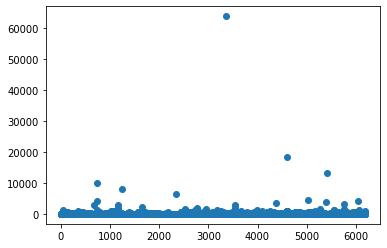

In [7]:
data = df.value
data.reset_index(inplace=True, drop=True)

import matplotlib.pyplot as plt
plt.scatter(data.index, data)
plt.show()

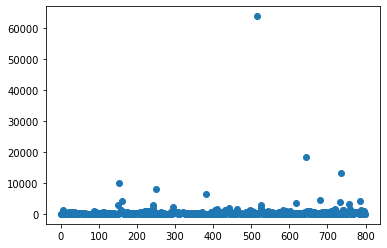

In [8]:
data = df.value.unique()
x = range(len(data))

import matplotlib.pyplot as plt
plt.scatter(x, data)
plt.show()

Index(['timestamp', 'accuracy', 'value'], dtype='object')


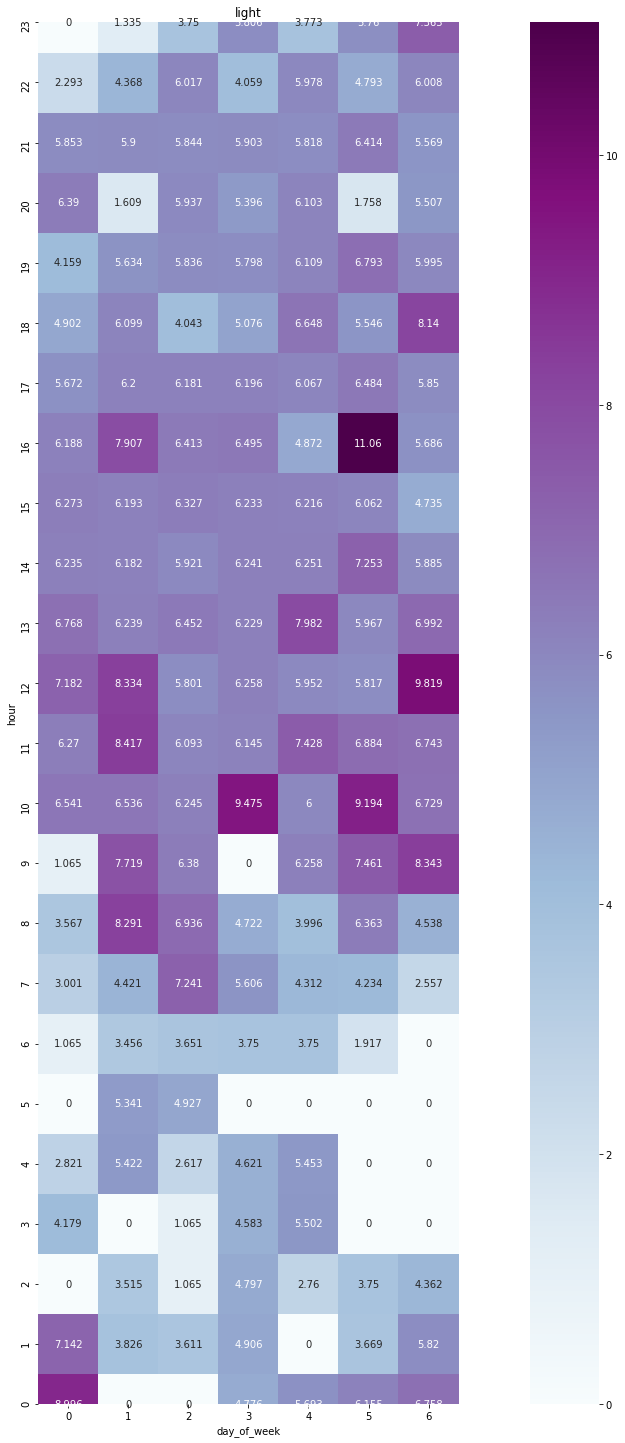

In [9]:
cat = 'light'
df = create_df(data_path, cat)
plot_logmax_heatmap(df, cat, norm=False)

[Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '4'),
 Text(0, 0, '5')]

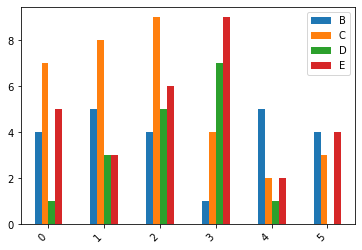

In [10]:
df = pd.DataFrame({'B':[4,5,4,1,5,4],
                   'C':[7,8,9,4,2,3],
                   'D':[1,3,5,7,1,0],
                   'E':[5,3,6,9,2,4]})

# df1 = df2 = df.copy()
# fig, axes = plt.subplots(nrows=2, ncols=2)
# df1.plot(x='B', y='C', ax=axes[0,0])
# df1.plot(x='B', y='D', ax=axes[0,1])
# df1.plot(x='B', y='E', ax=axes[1,0])
P = df.plot.bar(rot=45)
P.set_xticklabels(P.get_xticklabels(),ha='right')